导入数据库

In [14]:
import numpy as np
import pandas as pd
from sklearn import datasets
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import time
import random
import torch
from math import exp

划分数据集

In [35]:
#定义的一些超参数
t=0.14
lr=0.01
x_point=5
Epoch=3;
#初始化变量
THETA=np.zeros((2,1),dtype=float);


#构造数据集
noise=np.random.normal(0,2,size=600)
x=np.linspace(-5,5,600)
y=x**2+noise+3


#划分数据集
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)

#调整数据集
x_train=x_train.reshape((x_train.shape[0],1))
x_test=x_test.reshape((x_test.shape[0],1))
o_train=np.ones([x_train.shape[0],1],dtype=x_train.dtype)
o_test=np.ones([x_test.shape[0],1],dtype=x_test.dtype)
x_train=np.concatenate((o_train,x_train),axis=1)
x_test=np.concatenate((o_test,x_test),axis=1)



画图

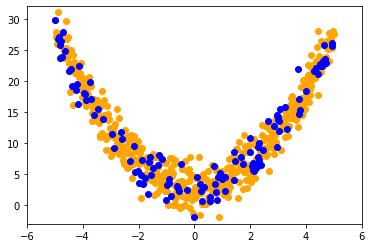

In [25]:
plt.scatter(x_train[:,1],y=y_train,c='orange')
plt.scatter(x_test[:,1],y=y_test,c='blue')
plt.xlim((-6,6))
plt.ylim((-3,32))
plt.show()

训练

In [36]:


def hypothesis(THETA,x):
    return THETA.T.dot(x)

def update_para(THETA,h_x,y,lr,x):
    w = exp(-(x[1] - x_point)**2 / (2*(t**2)))
    THETA=THETA-lr*w*(h_x-y)*x
    return THETA

for epoch in range(Epoch):
    for x,y in zip(x_train,y_train):
        x=x.reshape((2,1))
        h_x=hypothesis(THETA,x);
        THETA=update_para(THETA,h_x,y,lr,x);

print(THETA)
print(hypothesis(THETA,[[1],[5]]))

[[1.07752698]
 [5.28821671]]
[[27.51861053]]
